# Advanced Querying Mongo

Importing libraries and setting up connection

In [108]:
from pymongo import MongoClient
import re
from pandas.io.json import json_normalize
import pandas as pd

In [2]:
client = MongoClient("mongodb://localhost/companies")
db = client.get_database()

for c in db.list_collections():
    print(c["name"])
    
list(db.list_collections())

companies


[{'name': 'companies',
  'type': 'collection',
  'options': {},
  'info': {'readOnly': False,
   'uuid': UUID('7294c8df-8dae-40a1-b347-d171744188f7')},
  'idIndex': {'v': 2,
   'key': {'_id': 1},
   'name': '_id_',
   'ns': 'companies.companies'}}]

### 1. All the companies whose name match 'Babelgum'. Retrieve only their `name` field.

In [3]:
q1 = {'name':'Babelgum'}
list(db["companies"].find(q1,projection={'name':True}))

[{'_id': ObjectId('52cdef7c4bab8bd675297da0'), 'name': 'Babelgum'}]

### 2. All the companies that have more than 5000 employees. Limit the search to 20 companies and sort them by **number of employees**.

In [4]:
# Your Code
q2 = {'number_of_employees':{'$gte':5000}}
#Para hacer sort con 1 sólo valor, se utiliza la tupla con el -1 para hacerlo descendente.
top_emp = db.companies.find(q2,projection={'name','number_of_employees'}).sort('number_of_employees', -1).limit(20)
list(top_emp)

[{'_id': ObjectId('52cdef7d4bab8bd67529941a'),
  'name': 'Siemens',
  'number_of_employees': 405000},
 {'_id': ObjectId('52cdef7c4bab8bd67529856a'),
  'name': 'IBM',
  'number_of_employees': 388000},
 {'_id': ObjectId('52cdef7d4bab8bd675299d33'),
  'name': 'Toyota',
  'number_of_employees': 320000},
 {'_id': ObjectId('52cdef7c4bab8bd675297e89'),
  'name': 'PayPal',
  'number_of_employees': 300000},
 {'_id': ObjectId('52cdef7e4bab8bd67529b0fe'),
  'name': 'Nippon Telegraph and Telephone Corporation',
  'number_of_employees': 227000},
 {'_id': ObjectId('52cdef7d4bab8bd675298aa4'),
  'name': 'Samsung Electronics',
  'number_of_employees': 221726},
 {'_id': ObjectId('52cdef7d4bab8bd675298b99'),
  'name': 'Accenture',
  'number_of_employees': 205000},
 {'_id': ObjectId('52cdef7e4bab8bd67529a657'),
  'name': 'Tata Consultancy Services',
  'number_of_employees': 200300},
 {'_id': ObjectId('52cdef7e4bab8bd67529aa51'),
  'name': 'Flextronics International',
  'number_of_employees': 200000},
 {'

### 3. All the companies founded between 2000 and 2005, both years included. Retrieve only the `name` and `founded_year` fields.

In [5]:
# Your Code
q3 = {'$and':[{'founded_year':{"$gte":2000}},{'founded_year':{"$lte":2005}}]}
found_year = db.companies.find(q3,projection={'name','founded_year'}).sort('founded_year',1)
list(found_year.limit(10))

[{'_id': ObjectId('52cdef7c4bab8bd675297dd5'),
  'name': 'AllofMP3',
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297dd9'),
  'name': 'Steorn',
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297ddb'),
  'name': 'MeeVee',
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297e38'),
  'name': 'PhotoBox',
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297e73'),
  'name': 'Boonex',
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297ea9'),
  'name': 'Sulake',
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297eb6'),
  'name': 'SelectMinds',
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297ef2'),
  'name': 'ContextWeb',
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297efd'),
  'name': 'ZoomInfo',
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297f12'),
  'name': 'eHarmony',
  'founded_year': 2000}]

### 4. All the companies that had a Valuation Amount of more than 100.000.000 and have been founded before 2010. Retrieve only the `name` and `ipo` fields.

In [6]:
# Your Code
q4 = {'$and':[{'ipo.valuation_amount':{'$gte':100000000}},{'founded_year':{'$lte':2010}}]}
val = db.companies.find(q4,projection={'name','ipo.valuation_amount','founded_year'}).sort('founded_year',1)
list(val.limit(20))

[{'_id': ObjectId('52cdef7c4bab8bd675297f15'),
  'name': 'Nielsen',
  'founded_year': 1922,
  'ipo': {'valuation_amount': 1600000000}},
 {'_id': ObjectId('52cdef7e4bab8bd67529b996'),
  'name': 'Western Digital',
  'founded_year': 1970,
  'ipo': {'valuation_amount': 9430000000}},
 {'_id': ObjectId('52cdef7c4bab8bd67529859a'),
  'name': 'BMC Software',
  'founded_year': 1980,
  'ipo': {'valuation_amount': 6000000000}},
 {'_id': ObjectId('52cdef7c4bab8bd6752987fe'),
  'name': 'Geeknet',
  'founded_year': 1993,
  'ipo': {'valuation_amount': 134000000}},
 {'_id': ObjectId('52cdef7d4bab8bd6752992c1'),
  'name': 'QlikTech',
  'founded_year': 1993,
  'ipo': {'valuation_amount': 1000000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297e7a'),
  'name': 'Amazon',
  'founded_year': 1994,
  'ipo': {'valuation_amount': 100000000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297f36'),
  'name': 'OpenTable',
  'founded_year': 1998,
  'ipo': {'valuation_amount': 1050000000}},
 {'_id': ObjectId('52cdef7c4bab8

### 5. All the companies that have less than 1000 employees and have been founded before 2005. Order them by the number of employees and limit the search to 10 companies.

In [7]:
# Your Code
q5 = {'$and':[{'number_of_employees':{'$lt':1000}},{'founded_year':{'$lte':2005}}]}
emp_year = db.companies.find(q5,projection={'name','number_of_employees','founded_year'}).sort('number_of_employees',-1)
list(emp_year.limit(10))

[{'_id': ObjectId('52cdef7d4bab8bd675298933'),
  'name': 'Infinera Corporation',
  'number_of_employees': 974,
  'founded_year': 2000},
 {'_id': ObjectId('52cdef7c4bab8bd675297e10'),
  'name': 'Box',
  'number_of_employees': 950,
  'founded_year': 2005},
 {'_id': ObjectId('52cdef7e4bab8bd67529ac95'),
  'name': 'NorthPoint Communications Group',
  'number_of_employees': 948,
  'founded_year': 1997},
 {'_id': ObjectId('52cdef7f4bab8bd67529be17'),
  'name': '888 Holdings',
  'number_of_employees': 931,
  'founded_year': 1997},
 {'_id': ObjectId('52cdef7c4bab8bd6752986a2'),
  'name': 'Forrester Research',
  'number_of_employees': 903,
  'founded_year': 1983},
 {'_id': ObjectId('52cdef7c4bab8bd6752984e9'),
  'name': 'Workday',
  'number_of_employees': 900,
  'founded_year': 2005},
 {'_id': ObjectId('52cdef7e4bab8bd67529af6d'),
  'name': 'SonicWALL',
  'number_of_employees': 900,
  'founded_year': 1991},
 {'_id': ObjectId('52cdef7e4bab8bd67529b21b'),
  'name': 'Webmetrics',
  'number_of_empl

### 6. All the companies that don't include the `partners` field.

In [27]:
# Your Code
q6={'partners':{'$exists': False}}
no_par = db.companies.find(q6,projection={'name'})
if no_par==[]:
    print(list(no_par))
else:
    print("Todos los documentos tienen el campo 'partners'")

Todos los documentos tienen el campo 'partners'


### 7. All the companies that have a null type of value on the `category_code` field.

In [34]:
# Your Code
q7 = { 'category_code': None }
null_cat = db.companies.find(q7,projection={'name','category_code'})
list(null_cat.limit(20))

[{'_id': ObjectId('52cdef7c4bab8bd6752980f6'),
  'name': 'Collective',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd675298225'),
  'name': 'Snimmer',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd675298226'),
  'name': 'KoolIM',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd675298261'),
  'name': 'Level9 Media',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd675298262'),
  'name': 'VidKing',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd67529826e'),
  'name': 'Drigg',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd675298276'),
  'name': 'SpaceTime',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd67529827a'),
  'name': 'MMDAYS',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd675298279'),
  'name': 'Touch Clarity',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd67529827b'),
  'name': 'Inside Group',
  'category_code': None},
 {'_id': ObjectId('52cdef7c4bab8bd67529827e

### 8. All the companies that have at least 100 employees but less than 1000. Retrieve only the `name` and `number of employees` fields.

In [38]:
# Your Code
q8 = {'$and':[{'number_of_employees':{'$gte':100}},{'number_of_employees':{'$lt':1000}}]}
emp = db.companies.find(q8,projection={'name','number_of_employees'}).sort('number_of_employees',-1)
list(emp.limit(10))

[{'_id': ObjectId('52cdef7d4bab8bd67529a136'),
  'name': 'Datamonitor',
  'number_of_employees': 984},
 {'_id': ObjectId('52cdef7d4bab8bd675298933'),
  'name': 'Infinera Corporation',
  'number_of_employees': 974},
 {'_id': ObjectId('52cdef7c4bab8bd675297e10'),
  'name': 'Box',
  'number_of_employees': 950},
 {'_id': ObjectId('52cdef7e4bab8bd67529ac95'),
  'name': 'NorthPoint Communications Group',
  'number_of_employees': 948},
 {'_id': ObjectId('52cdef7f4bab8bd67529be17'),
  'name': '888 Holdings',
  'number_of_employees': 931},
 {'_id': ObjectId('52cdef7c4bab8bd6752986a2'),
  'name': 'Forrester Research',
  'number_of_employees': 903},
 {'_id': ObjectId('52cdef7c4bab8bd6752984e9'),
  'name': 'Workday',
  'number_of_employees': 900},
 {'_id': ObjectId('52cdef7c4bab8bd675298857'),
  'name': 'InMobi',
  'number_of_employees': 900},
 {'_id': ObjectId('52cdef7e4bab8bd67529acec'),
  'name': 'Relax Solutions Pvt Ltd',
  'number_of_employees': 900},
 {'_id': ObjectId('52cdef7e4bab8bd67529af

### 9. Order all the companies by their IPO price in a descending order.

In [39]:
# Your Code
q9 = {'ipo.valuation_amount':{'$exists': True}}
ipo = db.companies.find(q9,projection={'name','ipo.valuation_amount'}).sort('ipo.valuation_amount',-1)
list(ipo.limit(10))

[{'_id': ObjectId('52cdef7e4bab8bd67529a8b4'),
  'name': 'GREE',
  'ipo': {'valuation_amount': 108960000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297d8e'),
  'name': 'Facebook',
  'ipo': {'valuation_amount': 104000000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297e7a'),
  'name': 'Amazon',
  'ipo': {'valuation_amount': 100000000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297d94'),
  'name': 'Twitter',
  'ipo': {'valuation_amount': 18100000000}},
 {'_id': ObjectId('52cdef7d4bab8bd675299d5d'),
  'name': 'Groupon',
  'ipo': {'valuation_amount': 12800000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675298674'),
  'name': 'Tencent',
  'ipo': {'valuation_amount': 11000000000}},
 {'_id': ObjectId('52cdef7e4bab8bd67529b996'),
  'name': 'Western Digital',
  'ipo': {'valuation_amount': 9430000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297e0c'),
  'name': 'LinkedIn',
  'ipo': {'valuation_amount': 9310000000}},
 {'_id': ObjectId('52cdef7c4bab8bd67529859a'),
  'name': 'BMC Software',
  'ipo': {'valua

### 10. Retrieve the 10 companies with more employees, order by the `number of employees`

In [45]:
# Your Code
q10={'number_of_employees':{'$gte':100}}
maxemp = db.companies.find(q10,projection={'name','number_of_employees'}).sort('number_of_employees',-1)
list(maxemp.limit(10))

[{'_id': ObjectId('52cdef7d4bab8bd67529941a'),
  'name': 'Siemens',
  'number_of_employees': 405000},
 {'_id': ObjectId('52cdef7c4bab8bd67529856a'),
  'name': 'IBM',
  'number_of_employees': 388000},
 {'_id': ObjectId('52cdef7d4bab8bd675299d33'),
  'name': 'Toyota',
  'number_of_employees': 320000},
 {'_id': ObjectId('52cdef7c4bab8bd675297e89'),
  'name': 'PayPal',
  'number_of_employees': 300000},
 {'_id': ObjectId('52cdef7e4bab8bd67529b0fe'),
  'name': 'Nippon Telegraph and Telephone Corporation',
  'number_of_employees': 227000},
 {'_id': ObjectId('52cdef7d4bab8bd675298aa4'),
  'name': 'Samsung Electronics',
  'number_of_employees': 221726},
 {'_id': ObjectId('52cdef7d4bab8bd675298b99'),
  'name': 'Accenture',
  'number_of_employees': 205000},
 {'_id': ObjectId('52cdef7e4bab8bd67529a657'),
  'name': 'Tata Consultancy Services',
  'number_of_employees': 200300},
 {'_id': ObjectId('52cdef7e4bab8bd67529aa51'),
  'name': 'Flextronics International',
  'number_of_employees': 200000},
 {'

### 11. All the companies founded on the second semester of the year. Limit your search to 1000 companies.

In [81]:
# Your Code

q11 ={'$and':[{'founded_month':{'$gte': 6}},{'founded_month':{'$lte':12}}]}
secsem = db.companies.find(q11,projection={'name','founded_month'}).sort('founded_month',1).limit(10)
list(secsem)

[{'_id': ObjectId('52cdef7c4bab8bd675297d90'),
  'name': 'Postini',
  'founded_month': 6},
 {'_id': ObjectId('52cdef7c4bab8bd675297d91'),
  'name': 'Geni',
  'founded_month': 6},
 {'_id': ObjectId('52cdef7c4bab8bd675297d93'),
  'name': 'Fox Interactive Media',
  'founded_month': 6},
 {'_id': ObjectId('52cdef7c4bab8bd675297da5'),
  'name': 'Technorati',
  'founded_month': 6},
 {'_id': ObjectId('52cdef7c4bab8bd675297daa'),
  'name': 'Sparter',
  'founded_month': 6},
 {'_id': ObjectId('52cdef7c4bab8bd675297dc8'),
  'name': 'Topix',
  'founded_month': 6},
 {'_id': ObjectId('52cdef7c4bab8bd675297dca'),
  'name': 'Pownce',
  'founded_month': 6},
 {'_id': ObjectId('52cdef7c4bab8bd675297dd5'),
  'name': 'AllofMP3',
  'founded_month': 6},
 {'_id': ObjectId('52cdef7c4bab8bd675297dfc'),
  'name': 'TripHub',
  'founded_month': 6},
 {'_id': ObjectId('52cdef7c4bab8bd675297e00'),
  'name': 'TVtrip',
  'founded_month': 6}]

### 12. All the companies founded before 2000 that have an acquisition amount of more than 10.000.00

In [67]:
# Your Code
q12 = {'$and':[{'ipo.valuation_amount':{'$gte':1000000}},{'founded_year':{'$lte':2000}}]}
foaq = db.companies.find(q12,projection={'name','ipo.valuation_amount','founded_year'}).sort('ipo.valuation_amount',-1)
list(foaq.limit(10))

[{'_id': ObjectId('52cdef7c4bab8bd675297e7a'),
  'name': 'Amazon',
  'founded_year': 1994,
  'ipo': {'valuation_amount': 100000000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675298674'),
  'name': 'Tencent',
  'founded_year': 1998,
  'ipo': {'valuation_amount': 11000000000}},
 {'_id': ObjectId('52cdef7e4bab8bd67529b996'),
  'name': 'Western Digital',
  'founded_year': 1970,
  'ipo': {'valuation_amount': 9430000000}},
 {'_id': ObjectId('52cdef7c4bab8bd67529859a'),
  'name': 'BMC Software',
  'founded_year': 1980,
  'ipo': {'valuation_amount': 6000000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675298527'),
  'name': 'Rackspace',
  'founded_year': 1998,
  'ipo': {'valuation_amount': 5440000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675298760'),
  'name': 'Baidu',
  'founded_year': 1999,
  'ipo': {'valuation_amount': 4000000000}},
 {'_id': ObjectId('52cdef7c4bab8bd6752981a7'),
  'name': 'TripAdvisor',
  'founded_year': 2000,
  'ipo': {'valuation_amount': 3273770000}},
 {'_id': ObjectId('52cdef7c4b

### 13. All the companies that have been acquired after 2010, order by the acquisition amount, and retrieve only their `name` and `acquisition` field.

In [72]:
# Your Code
"acquisition.acquired_year"
q13 = {"acquisition.acquired_year":{'$gte':2010}}
acq = db.companies.find(q13,projection={'name',"acquisition.acquired_year"}).sort("acquisition.acquired_year",-1)
list(acq.limit(15))

[{'_id': ObjectId('52cdef7d4bab8bd675298d41'),
  'name': 'Sense Networks',
  'acquisition': {'acquired_year': 2014}},
 {'_id': ObjectId('52cdef7d4bab8bd67529a1a3'),
  'name': 'Nullsoft',
  'acquisition': {'acquired_year': 2014}},
 {'_id': ObjectId('52cdef7e4bab8bd67529ad53'),
  'name': 'Alverix',
  'acquisition': {'acquired_year': 2014}},
 {'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
  'name': 'Wetpaint',
  'acquisition': {'acquired_year': 2013}},
 {'_id': ObjectId('52cdef7c4bab8bd675297dbf'),
  'name': 'blogTV',
  'acquisition': {'acquired_year': 2013}},
 {'_id': ObjectId('52cdef7c4bab8bd675297ddd'),
  'name': 'Mashery',
  'acquisition': {'acquired_year': 2013}},
 {'_id': ObjectId('52cdef7c4bab8bd675297dee'),
  'name': 'Dailymotion',
  'acquisition': {'acquired_year': 2013}},
 {'_id': ObjectId('52cdef7c4bab8bd675297e06'),
  'name': 'adBrite',
  'acquisition': {'acquired_year': 2013}},
 {'_id': ObjectId('52cdef7c4bab8bd675297e5a'),
  'name': 'Grockit',
  'acquisition': {'acquired_year

### 14. Order the companies by their `founded year`, retrieving only their `name` and `founded year`.

In [76]:
# Your Code
q14 ={'founded_year':{'$gte':1500}}
fy = db.companies.find(q14,projection={'name','founded_year'}).sort('founded_year',-1)
list(fy.limit(10))

[{'_id': ObjectId('52cdef7c4bab8bd675297fec'),
  'name': 'Fixya',
  'founded_year': 2013},
 {'_id': ObjectId('52cdef7c4bab8bd67529801f'),
  'name': 'Wamba',
  'founded_year': 2013},
 {'_id': ObjectId('52cdef7c4bab8bd6752982d4'),
  'name': 'Advaliant',
  'founded_year': 2013},
 {'_id': ObjectId('52cdef7c4bab8bd67529830a'),
  'name': 'Fluc',
  'founded_year': 2013},
 {'_id': ObjectId('52cdef7d4bab8bd675298ea7'),
  'name': 'iBazar',
  'founded_year': 2013},
 {'_id': ObjectId('52cdef7d4bab8bd675298fe1'),
  'name': 'Gimigo',
  'founded_year': 2013},
 {'_id': ObjectId('52cdef7d4bab8bd675299291'),
  'name': 'SEOGroup',
  'founded_year': 2013},
 {'_id': ObjectId('52cdef7e4bab8bd67529a3b8'),
  'name': 'Clowdy',
  'founded_year': 2013},
 {'_id': ObjectId('52cdef7e4bab8bd67529a6e7'),
  'name': 'WhosCall',
  'founded_year': 2013},
 {'_id': ObjectId('52cdef7e4bab8bd67529b254'),
  'name': 'Pikk',
  'founded_year': 2013}]

### 15. All the companies that have been founded on the first seven days of the month, including the seventh. Sort them by their `acquisition price` in a descending order. Limit the search to 10 documents.

In [86]:
# Your Code
q15 = {'$and':[{'founded_day':{'$gte':1}},{'founded_day':{'$lte':7}}]}
fd = db.companies.find(q15,projection={'name','acquisition.price_amount','founded_day'}).limit(10).sort('acquisition.price_amount',-1)
list(fd)

[{'_id': ObjectId('52cdef7d4bab8bd6752989a1'),
  'name': 'Netscape',
  'founded_day': 4,
  'acquisition': {'price_amount': 4200000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297e89'),
  'name': 'PayPal',
  'founded_day': 1,
  'acquisition': {'price_amount': 1500000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297efe'),
  'name': 'Zappos',
  'founded_day': 1,
  'acquisition': {'price_amount': 1200000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297f0c'),
  'name': 'Alibaba',
  'founded_day': 1,
  'acquisition': {'price_amount': 1000000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675297d90'),
  'name': 'Postini',
  'founded_day': 2,
  'acquisition': {'price_amount': 625000000}},
 {'_id': ObjectId('52cdef7c4bab8bd67529831c'),
  'name': 'Danger',
  'founded_day': 1,
  'acquisition': {'price_amount': 500000000}},
 {'_id': ObjectId('52cdef7c4bab8bd675298651'),
  'name': 'Clearwell Systems',
  'founded_day': 6,
  'acquisition': {'price_amount': 410000000}},
 {'_id': ObjectId('52cdef7d4bab8bd6752989b8

In [90]:
# NO ES LO MISMO ACQUISITION QUE ACQUISITIONS!!
q15 = {'$and':[{'founded_day':{'$gte':1}},{'founded_day':{'$lte':7}}]}
fd = db.companies.find(q15,projection={'name','acquisitions.price_amount','founded_day'}).limit(1).sort('acquisitions.price_amount',-1)
list(fd)

[{'_id': ObjectId('52cdef7c4bab8bd675297dba'),
  'name': 'Google',
  'founded_day': 7,
  'acquisitions': [{'price_amount': 60000000},
   {'price_amount': 100000000},
   {'price_amount': 102000000},
   {'price_amount': None},
   {'price_amount': 12000000},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': 3100000000},
   {'price_amount': 50000000},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': 23000000},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': 102000000},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': None},
   {'price_amount': Non

### 16. All the companies on the 'web' `category` that have more than 4000 employees. Sort them by the amount of employees in ascending order.

In [92]:
# Your Code
q16 = {'$and':[{'number_of_employees':{'$gte':4000}},{'category_code':"web"}]}
cat = db.companies.find(q16,projection={'name','category_code','number_of_employees'}).sort('number_of_employees',1)
list(cat.limit(10))

[{'_id': ObjectId('52cdef7c4bab8bd67529822a'),
  'name': 'Expedia',
  'category_code': 'web',
  'number_of_employees': 4400},
 {'_id': ObjectId('52cdef7c4bab8bd675297e96'),
  'name': 'AOL',
  'category_code': 'web',
  'number_of_employees': 8000},
 {'_id': ObjectId('52cdef7c4bab8bd675297ea4'),
  'name': 'Webkinz',
  'category_code': 'web',
  'number_of_employees': 8657},
 {'_id': ObjectId('52cdef7c4bab8bd675297fcb'),
  'name': 'Rakuten',
  'category_code': 'web',
  'number_of_employees': 10000},
 {'_id': ObjectId('52cdef7c4bab8bd67529834c'),
  'name': 'Los Angeles Times Media Group',
  'category_code': 'web',
  'number_of_employees': 10000},
 {'_id': ObjectId('52cdef7d4bab8bd675299d5d'),
  'name': 'Groupon',
  'category_code': 'web',
  'number_of_employees': 10000},
 {'_id': ObjectId('52cdef7c4bab8bd675297da3'),
  'name': 'Yahoo!',
  'category_code': 'web',
  'number_of_employees': 13600},
 {'_id': ObjectId('52cdef7c4bab8bd675297d9b'),
  'name': 'eBay',
  'category_code': 'web',
  'num

### 17. All the companies whose acquisition amount is more than 10.000.000, and currency is 'EUR'.

In [98]:
# Your Code
q17 = {'$and':[{'acquisition.price_amount':{'$gte':10000000}},{'acquisition.price_currency_code':"EUR"}]}
fd = db.companies.find(q17,projection={'name','acquisition.price_amount','acquisition.price_currency_code'}).sort('acquisition.price_amount',-1)
list(fd.limit(10))

[{'_id': ObjectId('52cdef7d4bab8bd675298bf3'),
  'name': 'Apertio',
  'acquisition': {'price_amount': 140000000, 'price_currency_code': 'EUR'}},
 {'_id': ObjectId('52cdef7e4bab8bd67529a536'),
  'name': 'Webedia',
  'acquisition': {'price_amount': 70000000, 'price_currency_code': 'EUR'}},
 {'_id': ObjectId('52cdef7e4bab8bd67529b747'),
  'name': 'Tuenti Technologies',
  'acquisition': {'price_amount': 70000000, 'price_currency_code': 'EUR'}},
 {'_id': ObjectId('52cdef7f4bab8bd67529c0cf'),
  'name': 'BioMed Central',
  'acquisition': {'price_amount': 43400000, 'price_currency_code': 'EUR'}},
 {'_id': ObjectId('52cdef7d4bab8bd675298f47'),
  'name': 'Greenfield Online',
  'acquisition': {'price_amount': 40000000, 'price_currency_code': 'EUR'}},
 {'_id': ObjectId('52cdef7c4bab8bd675297f02'),
  'name': 'ZYB',
  'acquisition': {'price_amount': 31500000, 'price_currency_code': 'EUR'}},
 {'_id': ObjectId('52cdef7e4bab8bd67529a729'),
  'name': 'Wayfinder',
  'acquisition': {'price_amount': 240000

### 18. All the companies that have been acquired on the first trimester of the year. Limit the search to 10 companies, and retrieve only their `name` and `acquisition` fields.

In [101]:
# Your Code
q18 = {'$and':[{'acquisition.acquired_month':{'$gte':1}},{'acquisition.acquired_month':{'$lte':3}}]}
nameacq = db.companies.find(q18,projection={'name','acquisition'}).limit(10).sort('acquisition.price_amount',-1)
list(nameacq)

[{'_id': ObjectId('52cdef7c4bab8bd675298876'),
  'name': 'T-Mobile',
  'acquisition': {'price_amount': 39000000000,
   'price_currency_code': 'USD',
   'term_code': None,
   'source_url': 'http://techcrunch.com/2011/03/20/in-the-race-for-more-spectrum-att-is-acquiring-t-mobile-for-39-billion/',
   'source_description': 'In The Race For More Spectrum, AT&T Is Acquiring T-Mobile For $39 Billion',
   'acquired_year': 2011,
   'acquired_month': 3,
   'acquired_day': 20,
   'acquiring_company': {'name': 'AT&T', 'permalink': 'at-t'}}},
 {'_id': ObjectId('52cdef7c4bab8bd6752983f8'),
  'name': 'BEA Systems',
  'acquisition': {'price_amount': 8500000000,
   'price_currency_code': 'USD',
   'term_code': None,
   'source_url': 'http://www.oracle.com/corporate/press/2008_jan/bea.html',
   'source_description': 'Oracle to Acquire BEA Systems',
   'acquired_year': 2008,
   'acquired_month': 1,
   'acquired_day': 16,
   'acquiring_company': {'name': 'Oracle Corporation',
    'permalink': 'oracle'}}},

# Bonus
### 19. All the companies that have been founded between 2000 and 2010, but have not been acquired before 2011.

In [106]:
# Your Code
q19 = {'$and':[{'founded_year':{"$gte":2000}},{'founded_year':{"$lte":2010}},{'acquisition.acquired_year':{"$gte":2011}}]}
ye_ac = db.companies.find(q19,projection={'name','founded_year','acquisition.acquired_year'}).sort('founded_year',1)
list(ye_ac.limit(20))

[{'_id': ObjectId('52cdef7c4bab8bd675297eb6'),
  'name': 'SelectMinds',
  'founded_year': 2000,
  'acquisition': {'acquired_year': 2012}},
 {'_id': ObjectId('52cdef7c4bab8bd675297f99'),
  'name': 'WooMe',
  'founded_year': 2000,
  'acquisition': {'acquired_year': 2011}},
 {'_id': ObjectId('52cdef7c4bab8bd675298163'),
  'name': 'Smilebox',
  'founded_year': 2000,
  'acquisition': {'acquired_year': 2011}},
 {'_id': ObjectId('52cdef7c4bab8bd675298349'),
  'name': 'SnapNames',
  'founded_year': 2000,
  'acquisition': {'acquired_year': 2012}},
 {'_id': ObjectId('52cdef7c4bab8bd67529872c'),
  'name': 'Zong',
  'founded_year': 2000,
  'acquisition': {'acquired_year': 2011}},
 {'_id': ObjectId('52cdef7d4bab8bd675298c0a'),
  'name': 'Handmark',
  'founded_year': 2000,
  'acquisition': {'acquired_year': 2013}},
 {'_id': ObjectId('52cdef7d4bab8bd675298d9d'),
  'name': 'Bestofmedia Group',
  'founded_year': 2000,
  'acquisition': {'acquired_year': 2013}},
 {'_id': ObjectId('52cdef7d4bab8bd675298e2

### 20. All the companies that have been 'deadpooled' after the third year.

In [116]:
# Your Code
q20 = {'$and':[{'founded_year':{"$gte":1000}},{'deadpooled_year':{"$gte":1000}}]}
deadpooled = db.companies.find(q20,projection={'name','founded_year','deadpooled_year'}).sort('founded_year',1)
df = pd.DataFrame(deadpooled)

df.head()

,_id,name,founded_year,deadpooled_year
0,52cdef7e4bab8bd67529bab3,Nakaya Microdevices,1970,2010
1,52cdef7c4bab8bd6752984ca,Everex,1983,2009
2,52cdef7c4bab8bd675297f92,Trutap,1989,2009
3,52cdef7c4bab8bd6752981c2,bluepulse,1990,2010
4,52cdef7c4bab8bd675298871,BubbleShare,1991,2009


In [117]:
#Eliminamos la columna ID:
df = df.drop(columns="_id")

In [118]:
df.head()

,name,founded_year,deadpooled_year
0,Nakaya Microdevices,1970,2010
1,Everex,1983,2009
2,Trutap,1989,2009
3,bluepulse,1990,2010
4,BubbleShare,1991,2009


In [119]:
df.dtypes

name               object
founded_year        int64
deadpooled_year     int64
dtype: object

In [120]:
df["dif"]= df.deadpooled_year - df.founded_year

In [121]:
df.head()

,name,founded_year,deadpooled_year,dif
0,Nakaya Microdevices,1970,2010,40
1,Everex,1983,2009,26
2,Trutap,1989,2009,20
3,bluepulse,1990,2010,20
4,BubbleShare,1991,2009,18


In [129]:
df_deadpooled = df[df['dif'] > 3]
df_deadpooled.head()

,name,founded_year,deadpooled_year,dif
0,Nakaya Microdevices,1970,2010,40
1,Everex,1983,2009,26
2,Trutap,1989,2009,20
3,bluepulse,1990,2010,20
4,BubbleShare,1991,2009,18


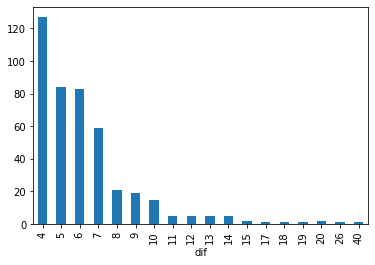

In [147]:
#Número de empresas que cerraron tras n años de abrir:
#127 empresas cerraron tras 4 años de ser fundada
#84 empresas cerraron tras 5 años de ser fundada....
df_deadpooled.groupby("dif").count()['name'].plot.bar(x="");

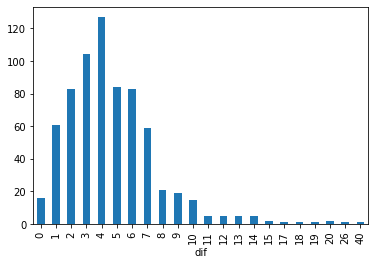

In [149]:
#Si analizamos en su conjunto: --> se filtra las >=0 porque hay algunos valores erroneos negativos.
df_0 = df[df["dif"] >= 0]
df_0.groupby("dif").count()['name'].plot.bar();